# Introduction to Data Science
## Homework 2

Student Name: Zhifan Nan

Student Netid: zn2041
***

### Part 1: Case study (5 Points)
- Read [this article](http://www.nytimes.com/2012/02/19/magazine/shopping-habits.html) in the New York Times.
- Use what we've learned in class and from the book to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using our data science terminology.  Include all the aspects of the data mining process, and be sure to include the motivation for predictive modeling and give a sketch of a solution.  Be precise but concise.

- The first step is to set up the problem we need to solve, which is we want to predict the probability of a women being pregrant or the probability of a women in their trimester, and if possible, we can also predict the delivery date of the baby. 


- Secondly, because the birth records are public, the data we are going to collect as much as possible is the history transactions of families that have records of a birth of child, no matter whether it happens in Target or not. We don't need their entire purchase history, but 1.5-2.5 years of transaction history before the baby's birth for each family would be optimal. 


- We can define a time period between their second trimester and the baby's arrival date, and add a binary feature _trimester_ that indicates whether this transaction happened within this time period. This actually divides our dataset into 2 parts, one of which is the transactions happened close to the arrival of baby, and the other one can be considered as all the regular transactions happened when there's no sign of pregnancy. We can treat each product or each product catgory (such as supplements, soap, cotton ball, etc) as a feature, and find their correlation with the feature _trimester_. If the correlation is high and the distribution of such product's sales when the _trimester_ is 1 significantly changed compared to their sales distribution when the _trimester_ is 0, we can say that this could be one of the products that indicate pregnancy. 


- We can find all such products, and filter our transaction table by only keeping records that contain at least one of these products. Each row will be a transaction, and the features are all the products that are correlated with pregnancy. The number of feature could be a lot, which can be solved by using dimension reduction techniques or simply grouping them into appropraite categories. The numerical value for each feature is just the amount they got purchased per transaction, and label is the binary _trimester_ feature (whether this transaction happened between their second trimester and the baby's delivery date). We can split this dataset into training, validation and testing sets, and fit a classification model to our training set, such as logistic regression, random forest, XGBoost classifier, and even neural network, all of which can gives us a probability of being pregnant. The metric we are going to use to measure our model is the cross-entropy loss, and we can tune the model's hyperparameter by optimizing the model's performance on the validation set. Finally, we can evaluate our model on the testing sets, and if the performance is great, we can deploy it and use it as a marketing strategy. 

### Part 2: Exploring data in the command line (4 Points)
For this part we will be using the data file located in `"data/advertising_events.csv"`. This file consists of records that pertain to some online advertising events on a given day. There are 4 comma separated columns in this order: `userid`, `timestamp`, `domain`, and `action`. These fields are of type `int`, `int`, `string`, and `int` respectively. Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in IPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.

[Hints: You can experiment with whatever you want in the notebook and then delete things to construct your answer later.  You can also use a bash shell (i.e., EC2 or a Mac terminal) and then just paste your answers here. Recall that once you enter the "!" then filename completion should work.]

[Here](https://opensource.com/article/17/2/command-line-tools-data-analysis-linux) is a good linux command line reference.

1\. How many records (lines) are in this file? (look up 'wc' command)

In [1]:
!wc -l advertising_events.csv

10341 advertising_events.csv


##### Answer: There are 10341 records in this file

2\. How many unique users are in this file? (hint: consider the 'cut' command and use pipe operator '|')

In [23]:
!cut -d',' -f1 advertising_events.csv | sort | uniq | wc -l

732


##### Answer: There are  732 unique  users in this file

3\. Rank all domains by the number of visits they received in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).

In [21]:
!cut -d',' -f3 advertising_events.csv | sort | uniq -c | sort -nr

   3114 google.com
   2092 facebook.com
   1036 youtube.com
   1034 yahoo.com
   1022 baidu.com
    513 wikipedia.org
    511 amazon.com
    382 qq.com
    321 twitter.com
    316 taobao.com


4\. List all records for the user with user id 37. (hint: this can be done using 'grep')

In [4]:
!grep -w 37 advertising_events.csv

37,648061658,google.com,0
37,642479972,google.com,2
37,644493341,facebook.com,2
37,654941318,facebook.com,1
37,649979874,baidu.com,1
37,653061949,yahoo.com,1
37,655020469,google.com,3
37,640878012,amazon.com,0
37,659864136,youtube.com,1
37,640361378,yahoo.com,1
37,653862134,facebook.com,0
37,648828970,youtube.com,0


### Part 3: Dealing with data Pythonically (16 Points)

1\. (1 Point) Download the data set `"data/ads_dataset.tsv"` and load it into a Python Pandas data frame called `ads`.

In [2]:
# Place your code here
import pandas as pd
ads = pd.read_csv('ads_dataset.tsv', sep='\t')

2\. (4 Points) Write a Python function called `getDfSummary()` that does the following:
- Takes as input a data frame
- For each variable in the data frame calculates the following features:
  - `number_nan` to count the number of missing not-a-number values
  - Ignoring missing, NA, and Null values:
    - `number_distinct` to count the number of distinct values a variable can take on
    - `mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles
- All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.
- Returns this new data frame containing all of the summary information

Hint: The pandas `describe()` method returns a useful series of values that can be used here.

In [125]:
def getDfSummary(input_data):
    nan_cnt = pd.DataFrame(input_data.aggregate(lambda x:x.isna().sum()))
    nan_cnt.columns = ['number_nan']
    uniq_cnt = pd.DataFrame(input_data.nunique())
    uniq_cnt.columns = ['number_distinct']
    stats = input_data.describe().iloc[1:].T
    output_data = pd.concat([nan_cnt, uniq_cnt, stats], axis=1)
    return output_data

In [126]:
getDfSummary(ads)

,number_nan,number_distinct,mean,std,min,25%,50%,75%,max
isbuyer,0,2,0.042632,0.202027,0.0000,0.0,0.0,0.000000,1.00000
buy_freq,52257,10,1.240653,0.782228,1.0000,1.0,1.0,1.000000,15.00000
visit_freq,0,64,1.852777,2.921820,0.0000,1.0,1.0,2.000000,84.00000
buy_interval,0,295,0.210008,3.922016,0.0000,0.0,0.0,0.000000,174.62500
sv_interval,0,5886,5.825610,17.595442,0.0000,0.0,0.0,0.104167,184.91670
expected_time_buy,0,348,-0.198040,4.997792,-181.9238,0.0,0.0,0.000000,84.28571
expected_time_visit,0,15135,-10.210786,31.879722,-187.6156,0.0,0.0,0.000000,91.40192
last_buy,0,189,64.729335,53.476658,0.0000,18.0,51.0,105.000000,188.00000
last_visit,0,189,64.729335,53.476658,0.0000,18.0,51.0,105.000000,188.00000
multiple_buy,0,2,0.006357,0.079479,0.0000,0.0,0.0,0.000000,1.00000


3\. How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.

Hint: `use %timeit`

In [80]:
%timeit summary = getDfSummary(ads)

74 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


4\. (2 Points) Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?

In [130]:
summary = getDfSummary(ads)
summary[summary['number_nan']!=0].index

Index(['buy_freq'], dtype='object')

5\. (4 Points) For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or make it more likely that the data is missing? If missing, what should the data value be? Don't just show code here. Please explain your answer.[Edit this to ask for more details on why they are 0]

Hint: create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?

In [136]:
# summary for the records without any missing data
getDfSummary(ads.dropna())

,number_nan,number_distinct,mean,std,min,25%,50%,75%,max
isbuyer,0,1,1.000000,0.000000,1.0000,1.000000,1.000000,1.00000,1.00000
buy_freq,0,10,1.240653,0.782228,1.0000,1.000000,1.000000,1.00000,15.00000
visit_freq,0,60,6.371723,8.680026,0.0000,2.000000,3.000000,7.00000,75.00000
buy_interval,0,295,4.926110,18.377272,0.0000,0.000000,0.000000,0.00000,174.62500
sv_interval,0,1367,8.952092,16.651559,0.0000,0.041667,3.354167,10.83333,176.70830
expected_time_buy,0,348,-4.645390,23.779721,-181.9238,0.000000,0.000000,0.00000,84.28571
expected_time_visit,0,1788,-22.370870,42.080323,-183.3626,-34.575625,-1.504768,0.00000,88.30038
last_buy,0,186,42.003438,47.980703,0.0000,3.000000,21.000000,70.00000,186.00000
last_visit,0,186,42.003438,47.980703,0.0000,3.000000,21.000000,70.00000,186.00000
multiple_buy,0,2,0.149119,0.356282,0.0000,0.000000,0.000000,0.00000,1.00000


In [185]:
# summary for the records only contains missing data
nan_df = ads[ads['buy_freq'].isna()]
nan_summary = getDfSummary(nan_df)
nan_summary

,number_nan,number_distinct,mean,std,min,25%,50%,75%,max
isbuyer,0,1,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000
buy_freq,52257,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_freq,0,48,1.651549,2.147955,1.0000,1.0,1.0,2.000000,84.00000
buy_interval,0,1,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000
sv_interval,0,5112,5.686388,17.623555,0.0000,0.0,0.0,0.041667,184.91670
expected_time_buy,0,1,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000
expected_time_visit,0,13351,-9.669298,31.239030,-187.6156,0.0,0.0,0.000000,91.40192
last_buy,0,189,65.741317,53.484622,0.0000,19.0,52.0,106.000000,188.00000
last_visit,0,189,65.741317,53.484622,0.0000,19.0,52.0,106.000000,188.00000
multiple_buy,0,1,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.00000


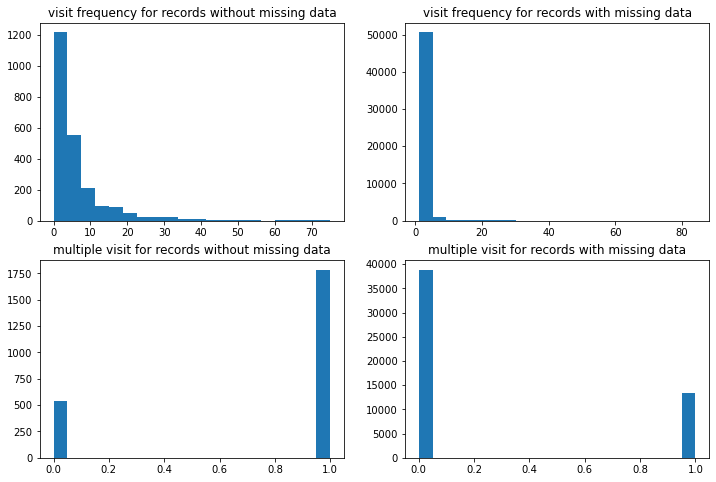

In [186]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12,8))

axes[0,0].hist(ads.dropna()['visit_freq'], bins=20)
axes[0,0].set_title('visit frequency for records without missing data')
axes[0,1].hist(nan_df['visit_freq'], bins=20)
axes[0,1].set_title('visit frequency for records with missing data')
axes[1,0].hist(ads.dropna()['multiple_visit'],bins=20)
axes[1,0].set_title('multiple visit for records without missing data')
axes[1,1].hist(nan_df['multiple_visit'],bins=20)
axes[1,1].set_title('multiple visit for records with missing data')
plt.show()

#### Observations:
It seems like the data is not missing at random. By comparing the summary of records containing missing values to the general summary and the summary with completely no missing value, I found out that for those records with a missing value on buy_freq field:
- It has a perfect correlation with variable _isbuyer_. If the data in _buy_freq_ is missing, their value for _isbuyer_ equals 0, otherwise, their value for _isbuyer_ is 1. Therefore, having a 0 in _isbuyer_ column tells us that the data in _buy_freq_ column will be missing.


- The records with missing data have a smaller average value for the _visit_freq_ column than those records that do not, so having a low _visit_freq_ makes the data more likely to be missing. (shown in the histogram)


- Most of the records with missing data have a value 0 in column _multiple_visit_, but for records without missing data, most of them have a value 1 in this column, so having 0 for _multiple_visit_ makes the data more likely to be missing (shown in the histogram). 


- Their value for variable _buy_interval_ and _multiple_buy_ are completely 0, which indicates that none of them purchased more than once. However, by observing those records without missing data, we can see that lots of them also have 0 in these columns, so having 0 on these columns only makes the data more likely to be missing. 


- Since all of them never purchased more than once, I'm wondering whether they have made any purchase before? It turns out that all of them have values for field _last_buy_, which means some of them actually made a purchase before. 


- One last thing is that all of the records with missing data have a value 0 for variable _expected_time_buy_, but even for those without missing data, the majortiy of them also have value 0 for that column, so having a 0 in _expected_time_buy_ only slightly increase the possibily that the data is missing. 

#### Imputation:
According to my observation, I can tell that none of them purchased more than once, but one confusion now is the meaning of variable _last_buy_ = 0. By observing all the records without missing data, some of them also have 0 for _last_buy_ column, but the minimum value for variable _buy_freq_ is 1. Therefore, I think it's safe to say that as long as there's a value for the _last_buy_ column, it means that they actually made a purchase, so I think imputing 1 will be appropraite for the missing data in _buy_freq_ column.

6\. (4 Points) Which variables are binary?

In [138]:
binary_var = []
for column in ads.columns:
    if list(dict(ads[column].value_counts()).keys()) == [0, 1]:
        binary_var.append(column)
    else:
        continue
binary_var

['isbuyer', 'multiple_buy', 'multiple_visit', 'y_buy']